In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 

In [2]:
df = pd.read_csv("../UNZIP_FOR_NOTEBOOKS_FINAL/DATA/mouse_viral_study.csv")

df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


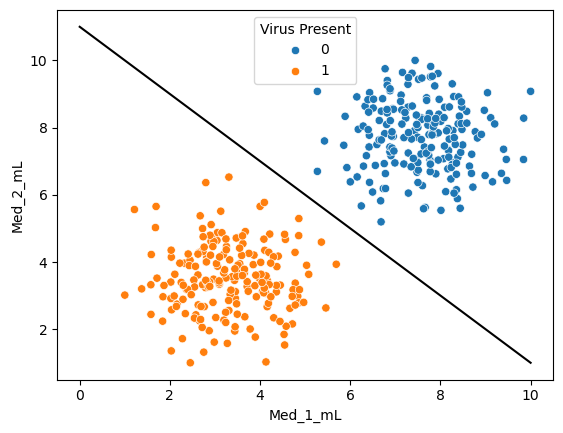

In [5]:
sns.scatterplot(x="Med_1_mL" , y="Med_2_mL" , data=df , hue="Virus Present")


# create hyperplane

x= np.linspace(0,10,100) 
m = -1 
b = 11 
y = m*x + b


plt.plot(x,y,"black")

In [6]:
from sklearn.svm import SVC

In [7]:
y = df["Virus Present"]

x = df.drop("Virus Present" , axis=1)

In [8]:
# create model

model = SVC(kernel="linear" , C=1000)

In [9]:
model.fit(x,y)

SVC(C=1000, kernel='linear')

In [10]:
from svm_margin_plot import  plot_svm_boundary

/home/jdiego/anaconda3/envs/tesis/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


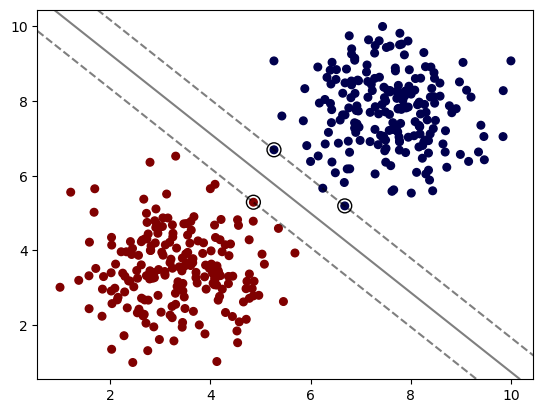

In [11]:
plot_svm_boundary(model , x , y )

In [13]:
# lets check other models 

model = SVC(kernel="linear" , C= 0.05)
model.fit(x,y)

SVC(C=0.05, kernel='linear')

/home/jdiego/anaconda3/envs/tesis/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


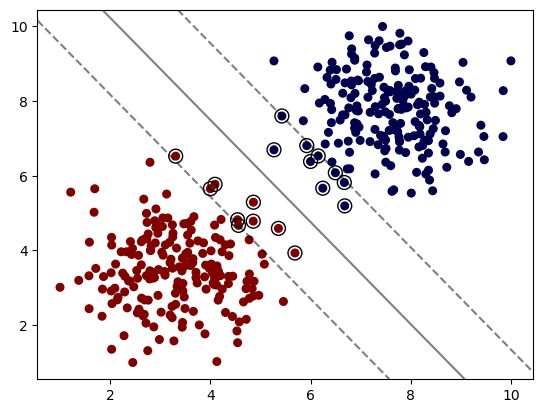

In [14]:
plot_svm_boundary(model, x,y)

/home/jdiego/anaconda3/envs/tesis/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


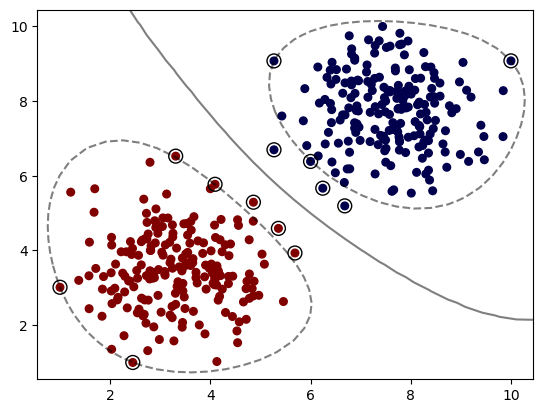

In [15]:
# rbf kernel --> commonly the best kernel
model = SVC(kernel="rbf" , C=1)
model.fit(x,y)
plot_svm_boundary(model,x,y)

/home/jdiego/anaconda3/envs/tesis/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


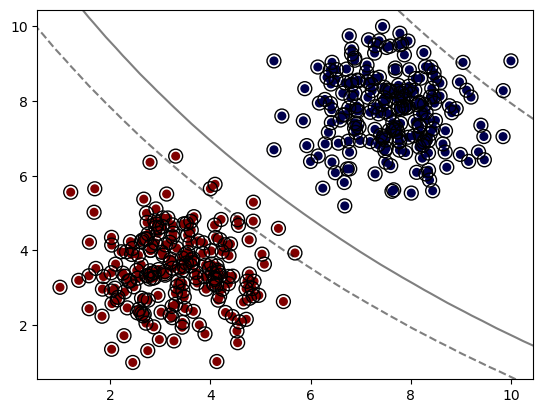

In [16]:
# sigmoid kernel

model = SVC(kernel="sigmoid")
model.fit(x,y)
plot_svm_boundary(model,x ,y)

/home/jdiego/anaconda3/envs/tesis/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


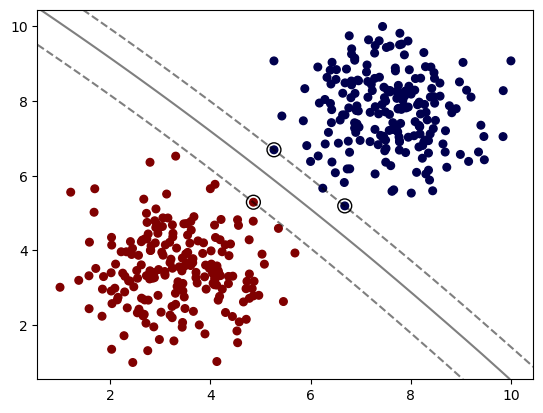

In [18]:
model = SVC(kernel="poly" , degree=4)
model.fit(x,y)
plot_svm_boundary(model,x,y)

In [19]:
# grid search is always better

from sklearn.model_selection import GridSearchCV

# create instance of the model
svm = SVC()

param_grid = {"C": [0.01,0.1 ,1] , "kernel":["linear" , "rbf"]}

In [20]:
grid = GridSearchCV(svm , param_grid)

In [21]:
grid.fit(x,y)
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

# SVM FOR REGRESSION

In [23]:
df = pd.read_csv("../UNZIP_FOR_NOTEBOOKS_FINAL/DATA/cement_slump.csv")
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


<Axes: >

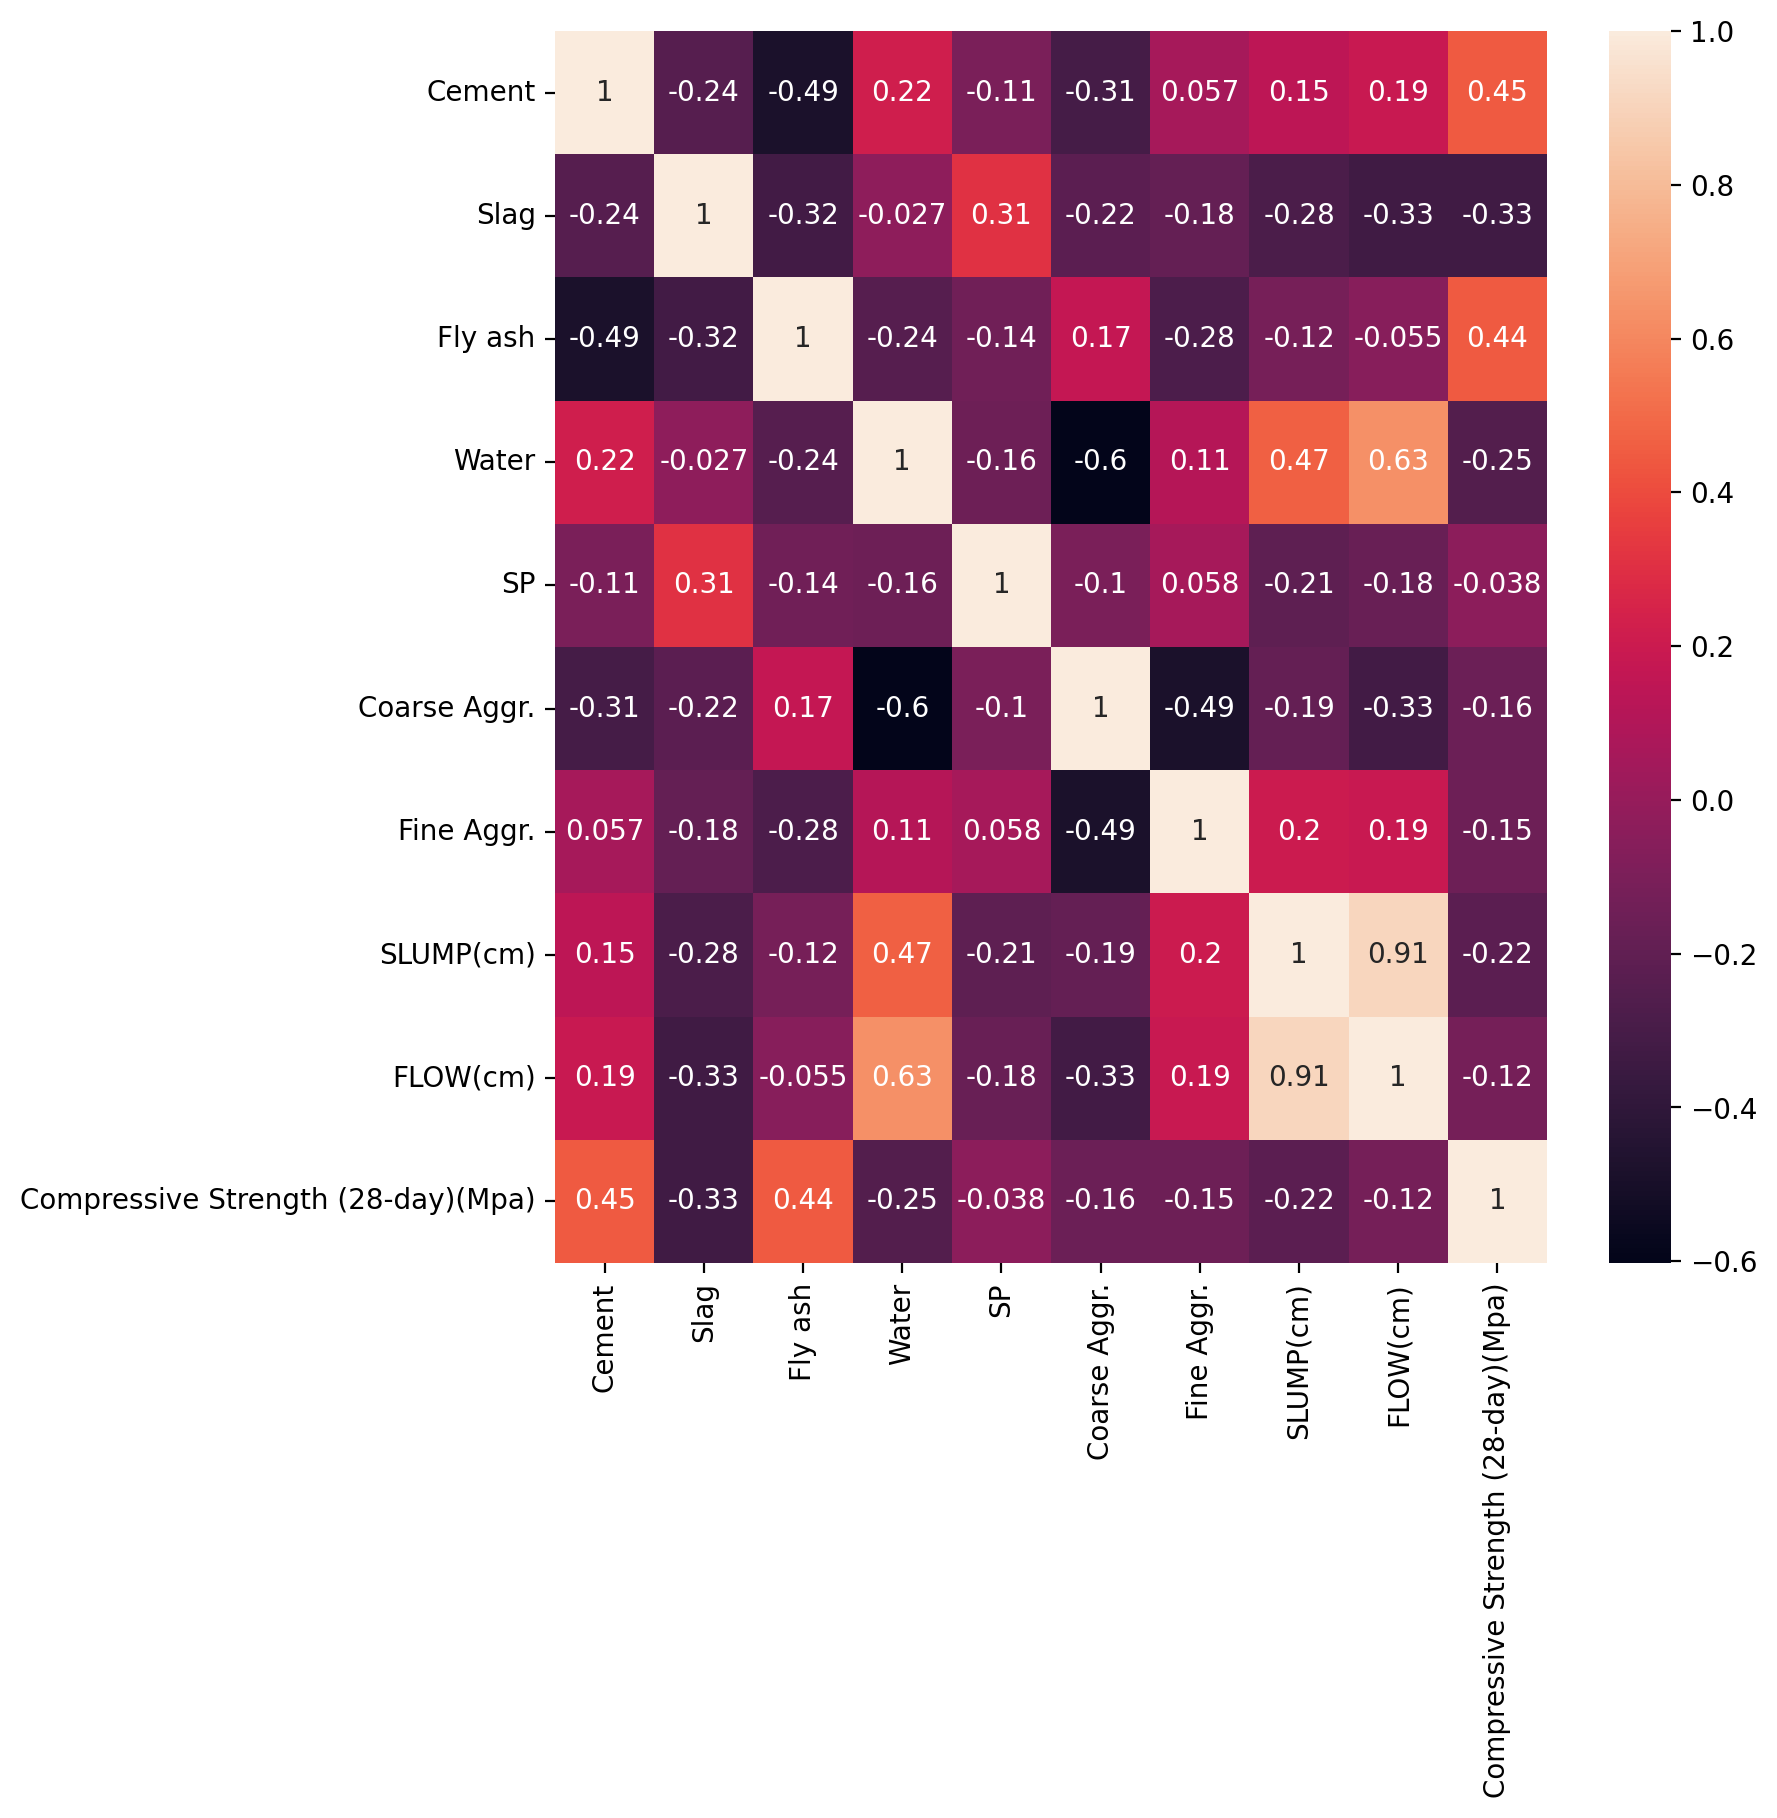

In [26]:
plt.figure(figsize=(8,8), dpi=200)
sns.heatmap(df.corr(), annot=True)

In [28]:
# we want to predict the resistance based on the feature values 
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [29]:
X= df.drop("Compressive Strength (28-day)(Mpa)", axis=1)
y = df["Compressive Strength (28-day)(Mpa)"]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [32]:
# always scale data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


In [33]:
from sklearn.svm import SVR, LinearSVR 

In [34]:
base_model = SVR()
base_model.fit(scaled_X_train, y_train)

SVR()

In [35]:
base_pred = base_model.predict(scaled_X_test)

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [37]:
mean_absolute_error(y_test, base_pred)

5.236902091259178

In [38]:
np.sqrt(mean_squared_error(y_test,base_pred))

6.695914838327133

In [39]:
y_test.mean()

36.26870967741935

In [40]:
# grid search 

param_grid = {"C":[0.001, 0.01, 0.1, 0.5,1], 
              "kernel":["linear", "rbf", "poly"],
              "gamma":["scale" , "auto"],
              "degree":[2,3,4],
               "epsilon":[0,0.01, 0.1, 0.5 , 1 , 2] }

In [41]:
from sklearn.model_selection import GridSearchCV

svr = SVR()
grid = GridSearchCV(svr, param_grid=param_grid)

In [42]:
grid.fit(  scaled_X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [43]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [44]:
grid_predictions = grid.predict(scaled_X_test)

In [45]:
mean_absolute_error(y_test, grid_predictions)

2.5128012210762356

In [46]:
np.sqrt(mean_squared_error(y_test,grid_predictions))

3.1782103051198582